In [19]:
# Import required python packages to be used throughout
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u

In [20]:
# Define the filename of the continuum image
#continuum = 'NGC3783_calibrated_final_cont_image.pbcor.fits'
continuum = '2331p073_calibrated_final_cont_image.pbcor.fits'

# Define the filename of the HCO+ line cube:
#spectral_cube = 'NGC3783_HCO.image.fits'
spectral_cube = '2331p073_HCO.image.fits'

In [21]:
# Open the continuum image FITS file using astropy fits
hdu_list = fits.open(continuum)

# Print the contents of the fits file
print hdu_list.info()

Filename: 2331p073_calibrated_final_cont_image.pbcor.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     400   (336, 336, 1, 1)   float32   
None


In [22]:
# Extract the image header and data from the PRIMARY block (i.e., number "0")
header = hdu_list[0].header
cont_map = hdu_list[0].data

# Print the shape of the continuum map
print np.shape(cont_map)

# "Squeeze" the redundant dimensions away to extract a 2x2 map using numpy squeeze
cont_map = np.squeeze(cont_map)
print np.shape(cont_map)

(1, 1, 336, 336)
(336, 336)


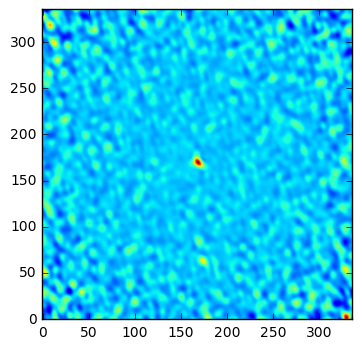

In [23]:
# For a first-look at the continuum map, use matplotlib to display cont_map
plt.imshow(cont_map, origin='lower')
plt.show()

In [24]:
# Determine the pixel location of peak flux density:
peak = np.where(cont_map == cont_map.max())
print 'Peak location', peak

# Compute peak flux density:
cont_peak = cont_map[peak[0],peak[1]]
print 'Peak value', cont_peak

# Compute rms noise in off-source pixels:
cont_rms = np.std(cont_map[100:150,100:150])
print 'RMS', cont_rms

Peak location (array([169]), array([168]))
Peak value [ 0.46828368]
RMS 0.0172488


In [25]:
# Open the HCOFITS file using astropy fits
hdu_list = fits.open(spectral_cube)

# Print the contents of the fits file
print hdu_list.info()

Filename: 2331p073_HCO.image.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     410   (336, 336, 984, 1)   float32   
None


In [26]:
# Extract the image header and data from the PRIMARY block (i.e., number "0")
header = hdu_list[0].header
hcop_cube = hdu_list[0].data

# Print the shape of the HCO+ cube
print np.shape(hcop_cube)

# "Squeeze" the redundant dimensions away to extract a 2x2 map using numpy squeeze
hcop_cube = np.squeeze(hcop_cube)
print np.shape(hcop_cube)

(1, 984, 336, 336)
(984, 336, 336)


In [27]:
# Compute rms noise in off-source pixels:
image_rms = np.std(hcop_cube[:,50:150,50:150])
print image_rms

0.0110776


In [28]:
# Extract the spectrum at the location of the maximum
# flux density found in the continuum image (i.e., "peak"):
spectrum = hcop_cube[:,peak[0],peak[1]]

In [29]:
# The extracted spectrum is a 1D python array
# Print its length
print len(spectrum)

984


In [30]:
# Define an array of channels with length equal
# to the length of the spectrum:
channels = np.arange(len(spectrum))

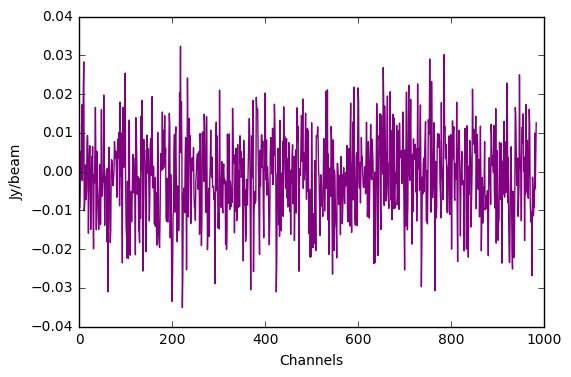

In [31]:
# Plot the spectrum as a function of channel numbers (defined above)
plt.plot(channels, spectrum, color='purple')
plt.xlabel('Channels')
plt.ylabel('Jy/beam')
plt.show()

RMS 0.0231885


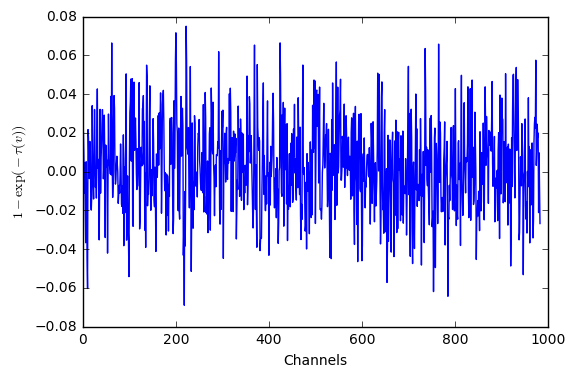

In [32]:
# Divide spectum by peak continuum flux density to compute
# the absorption spectrum (exp(-tau(v)))
emtau = (spectrum + cont_peak) / cont_peak
emtau = 1. - emtau

# Compute standard deviation in emtau:
rms = np.std(emtau)
print 'RMS', rms

# Plot absorption spectrum versus channels
plt.plot(channels, emtau)
plt.xlabel('Channels')
plt.ylabel(r'$1 - \exp{(-\tau(v))}$')
plt.show()